In [1]:
import scipy as sp
import scipy.stats

# Scipy.stats 에서 확률분포 사용하는 과정

```
0. 표본(sampled 지정)

    1) 동일 크기 구간 생성 : np.linspace(-8,8,100) / np.logspace(0.1,10,10)
    2) 구간 내 무작위 표본 생성 : rvs 메서드. rvs=random variable sampling 
       ex) rv.rvs(size=(3,5), random_satate=0), *random_state = 무작위 샘플링 시, seed값


1. 확률분포 클래스 선정
    
    종류	명령	확률분포
    이산	bernoulli	베르누이분포
    이산	binom	이항분포
    이산	multinomial	다항분포
    연속	uniform	균일분포
    연속	norm	정규분포
    연속	beta	베타분포
    연속	gamma	감마분포
    연속	t	스튜던트 t분포
    연속	chi2	카이 제곱분포
    연속	f	F분포
    연속	dirichlet	디리클리분포
    연속	multivariate_normal	다변수 정규분포


2. 모수지정 (parameter, shape factor)

    ex)
    
    인수(모수)   의미
    loc	     일반적으로 분포의 기댓값
    scale	   일반적으로 분포의 표준편차

    
3. 확률분포 메서드 (밀도, 분포함수 지정)

    메서드	기능
    pmf  확률질량함수(probability mass function)
    pdf	 확률밀도함수(probability density function)
    cdf	 누적분포함수(cumulative distribution function)
    ppf	 누적분포함수의 역함수(inverse cumulative distribution function)
    sf	 생존함수(survival function) = 1 - 누적분포함수
    isf	 생존함수의 역함수(inverse survival function)
    rvs	 랜덤 표본 생성(random variable sampling)
    
```    

# 1. 확률밀도함수(pdf) 생성

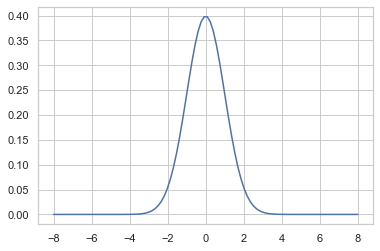

In [4]:
# 1. 확률분포 클래스 및 모수 지정 -> 확률변수 생성
rv = sp.stats.norm(loc = 0, scale = 1)

# 2. 메서드 지정(pdf)
# xx는 pdf, cdf의 분포 형태를 그리기 위해 구간을 설정한 것
xx = np.linspace(-8,8,100)
pdf = rv.pdf(xx)
plt.plot(xx,pdf)

# 2. 누적분포함수(cdf) 생성

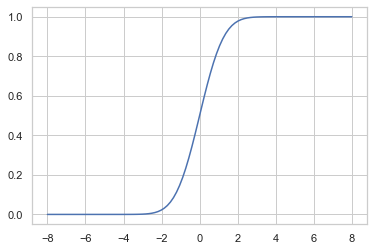

In [5]:
# 3. 메서드 지정(cdf)
xx = np.linspace(-8,8,100)
cdf = rv.cdf(xx)
plt.plot(xx,cdf)

# 3. 무작위 표본 생성
    - rvs = Random Variable Sampling

In [12]:
rv.rvs(size=(3,5),random_state=0)

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799],
       [-0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323]])

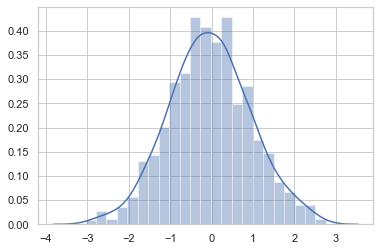

In [16]:
# 무작위 표본의 분포 확인 -> distplot

sns.distplot(rv.rvs(size=(1000),random_state=0))

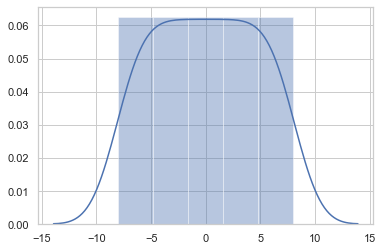

In [19]:
# 구간을 나타내는 xx는 linspace메서드로 동일 크기 구간 분할 값들임을 확인

sns.distplot(xx)

### 연습문제 

- rvs 명령으로 1000개의 정규분포의 표본 데이터를 생성하고 이 표본 데이터로부터 표본평균과 비편향 표본분산을 계산하라. 
    - 이 값이 인수로 넣은 기댓값과 분산과 비슷한지 비교하라.

In [30]:
# 1. 정규분포 클래스 및 모수 지정

rv = sp.stats.norm(loc=0,scale=1)

# 2. 표본 데이터 생성(1,000개)
rvs1 = rv.rvs(size=1000,random_state=0)

# 3. 표본 데이터의 표본평균, 비편향 표본분산 계산
# 비편향 표본분산 : 'ddof=1' 지정
print('표본 평균 : {}, 비편향 표본분산 : {}'.format(rvs1.mean(),rvs1.std(ddof=1)))

표본 평균 : -0.045256707490195384, 비편향 표본분산 : 0.9875270456945128


# 4. 변환 확률변수

    ex) 확률변수의 합

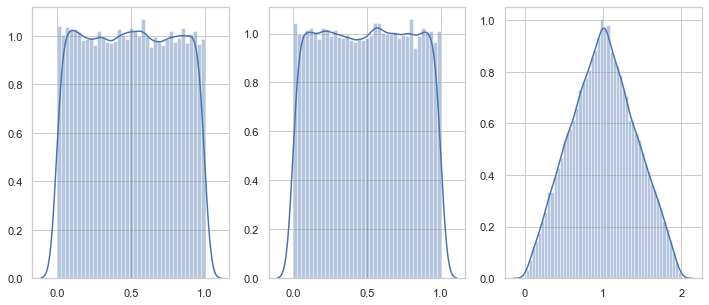

In [39]:
# 1. 균일분포의 두 확률변수 생성

rvx1 = sp.stats.uniform()
rvx2 = sp.stats.uniform()

# 2. 두 확률변수의 샘플링

x1 = rvx1.rvs(size = 50000, random_state = 0)
x2 = rvx2.rvs(size = 50000, random_state = 1)

# 3. 변환 확률변수 생성 = 두 확률변수의 합

x3 = x1 + x2

# 4. 변환 확률변수 샘플링, 기존 확률변수 2개의 샘플링 분포 확인

plt.figure(figsize = (12,5))

plt.subplot(131)
sns.distplot(x1)

plt.subplot(132)
sns.distplot(x2)

plt.subplot(133)
sns.distplot(x3)

plt.show()

### 연습문제 

- 균일분포 확률분포에서 두 개가 아닌 10개 표본값을 생성하여 그 값의 합을 구하면 어떤 모양의 분포를 이루는지 시뮬레이션 기능을 사용하여 구하라. 
    - 이 때 시뮬레이션은 1000번 반복한다.



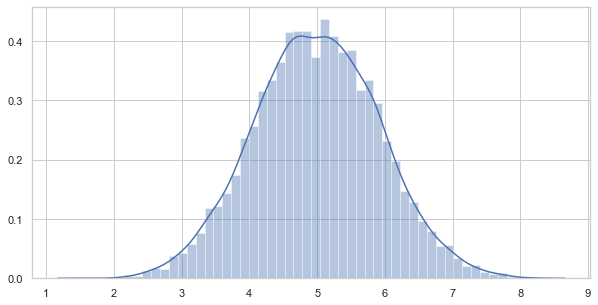

In [77]:
# 균일분포의 10개 표본 생성 -> 10,000번 반복
x = sp.stats.uniform().rvs((10,10000))

# 10개 표본의 합 -> 10,000개 생성
x_sum = x.sum(axis=0)

# 10개 표본의 합, 10,000개의 분포 확인 -> 10개를 더했으니, 0~10까지의 정규분포에 가까운 형태(중심극한정리)
plt.figure(figsize=(10,5))
sns.distplot(x_sum)

plt.show()